In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

In [48]:
titanic = pd.read_csv('./titanic/train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [49]:
titanic.isna().sum() # somme des données manquantes par colonne

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Preprocessing

In [50]:
titanic = titanic.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare']) # supprimer les colonnes inutiles
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [51]:
titanic.isna().sum() # somme des données manquantes par colonne

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [52]:
# titanic.Age.fillna(value={'age' :t['Age'].mean()}, inplace= True)
# titanic
titanic = titanic.dropna() # supprimer les données manquantes
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,Q
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
889,1,1,male,26.0,0,0,C


In [53]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Embarked  712 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 44.5+ KB


In [54]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch
count,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584
std,0.491139,0.836854,14.492933,0.930692,0.854181
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000
50%,0.000000,2.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000


In [55]:
titanic.Survived.unique()

array([0, 1], dtype=int64)

In [56]:
titanic.Survived.value_counts()

0    424
1    288
Name: Survived, dtype: int64

In [57]:
# titanic['SibSp'].value_counts()
# titanic['Parch'].value_counts()
# titanic['Fare'].value_counts(normalize=True)
# titanic['Age'].value_counts(normalize=True)
titanic['Sex'].value_counts(normalize=True)
titanic['Pclass'].value_counts(normalize=True)

3    0.498596
1    0.258427
2    0.242978
Name: Pclass, dtype: float64

In [58]:
pd.crosstab(titanic['Survived'], titanic['SibSp'], normalize=True, margins=True).T * 100

Survived,0,1,All
SibSp,,,
0,41.573034,24.297753,65.870787
1,12.078652,13.623596,25.702247
2,1.966292,1.544944,3.511236
3,1.123596,0.561798,1.685393
4,2.106742,0.421348,2.528090
5,0.702247,0.000000,0.702247
All,59.550562,40.449438,100.000000


In [59]:
pd.crosstab(titanic['Survived'], titanic['Sex'], normalize=True, margins=True).T * 100

Survived,0,1,All
Sex,,,
female,8.988764,27.387640,36.376404
male,50.561798,13.061798,63.623596
All,59.550562,40.449438,100.000000


In [60]:
pd.crosstab(titanic['Survived'], titanic['Pclass'], normalize=True, margins=True).T * 100

Survived,0,1,All
Pclass,,,
1,8.988764,16.853933,25.842697
2,12.640449,11.657303,24.297753
3,37.921348,11.938202,49.859551
All,59.550562,40.449438,100.000000


# Modèle de ML (Decision tree)

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
titanic.Sex=le.fit_transform(titanic.Sex)
titanic.Embarked=le.fit_transform(titanic.Embarked)
titanic

D:\Anaconda\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2
...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,1
886,0,2,1,27.0,0,0,2
887,1,1,0,19.0,0,0,2
889,1,1,1,26.0,0,0,0


# Sex : 0=>Female; 1=>Male
# Embarked : 0=>'Cherbourg', 1=> 'Southampton', 2=> 'Queenstown'

In [16]:
X = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]
y = titanic['Survived']
# X #  dataframe
# y #  Series

<AxesSubplot:>

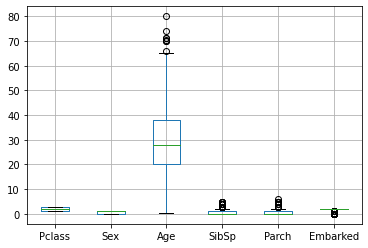

In [17]:
X.boxplot()

In [18]:
# Répartition de survived (**sans** `stratification`) à travers les deux échantillons `train` et `test`
X_train_sf, X_test_sf, y_train_sf, y_test_sf = train_test_split(X, y, random_state=42)

In [19]:
y_test_sf

641    1
496    1
262    0
311    1
551    0
      ..
323    1
615    1
577    1
263    0
687    0
Name: Survived, Length: 178, dtype: int64

In [20]:
y_test_sf.value_counts(normalize=True)

0    0.55618
1    0.44382
Name: Survived, dtype: float64

In [21]:
y_train_sf

703    0
462    0
858    1
429    1
811    0
      ..
93     0
135    0
338    1
549    1
131    0
Name: Survived, Length: 534, dtype: int64

In [22]:
y_train_sf.value_counts(normalize=True)

0    0.608614
1    0.391386
Name: Survived, dtype: float64

In [23]:
# Répartition de survived (**avec** `stratification`) à travers les deux échantillons `train` et `test`
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [24]:
y_train

44     1
27     0
72     0
685    0
370    1
      ..
192    1
268    1
852    0
735    0
211    1
Name: Survived, Length: 534, dtype: int64

In [25]:
y_train.value_counts(normalize=True)

0    0.595506
1    0.404494
Name: Survived, dtype: float64

In [26]:
y_test

583    0
817    0
737    1
422    0
90     0
      ..
439    0
733    0
769    0
33     0
378    0
Name: Survived, Length: 178, dtype: int64

In [27]:
y_test.value_counts(normalize=True)

0    0.595506
1    0.404494
Name: Survived, dtype: float64

# Construction de l'arbre de décision

In [28]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree

DecisionTreeClassifier(random_state=42)

In [29]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [30]:
tree.classes_
# print(tree.max_depth)
# tree.criterion

array([0, 1], dtype=int64)

In [31]:
y_pred = tree.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0], dtype=int64)

In [32]:
y_test.values

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

# Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[80, 26],
       [19, 53]], dtype=int64)

In [34]:
y_index = ['0 : Died', '1 : Survived']
pd.DataFrame(conf_mat, columns=y_index, index=y_index)

,0 : Died,1 : Survived
0 : Died,80,26
1 : Survived,19,53


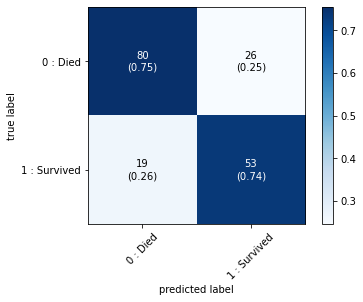

In [35]:
from mlxtend.plotting import plot_confusion_matrix

class_names = y_index

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names=class_names)

Accuracy score #1 method

In [36]:
acc1 = conf_mat.diagonal().sum()/conf_mat.sum()
acc1

0.7471910112359551

Accuracy score #2 method

In [37]:
from sklearn.metrics import accuracy_score
acc2 = accuracy_score(y_test, y_pred)
acc2

0.7471910112359551

Accuracy score #3 method

In [38]:
acc3 = tree.score(X_test, y_test)
acc3

0.7471910112359551

# Accuracy score : 74.71 %

### Formulaire

In [61]:
def survie():
    Pclass=int(input("Enter the Pclass : "))
    Sex=int(input("Enter the Sex : "))
    Age=int(input("Enter the Age : "))
    SibSp=int(input("Enter the SibSp : "))
    Parch=int(input("Enter the Parch : "))
    Embarked=int(input("Enter the Embarked port number : "))
    x = np.array([Pclass, Sex, Age, SibSp, Parch, Embarked]).reshape(1, 6)
    if tree.predict(x)[0]==0:
        return "Died"
    else:
        return "Survived"

In [62]:
survie()

Enter the Pclass : 1
Enter the Sex : 0
Enter the Age : 10
Enter the SibSp : 1
Enter the Parch : 2
Enter the Embarked port number : 1


'Survived'

# Tree plot

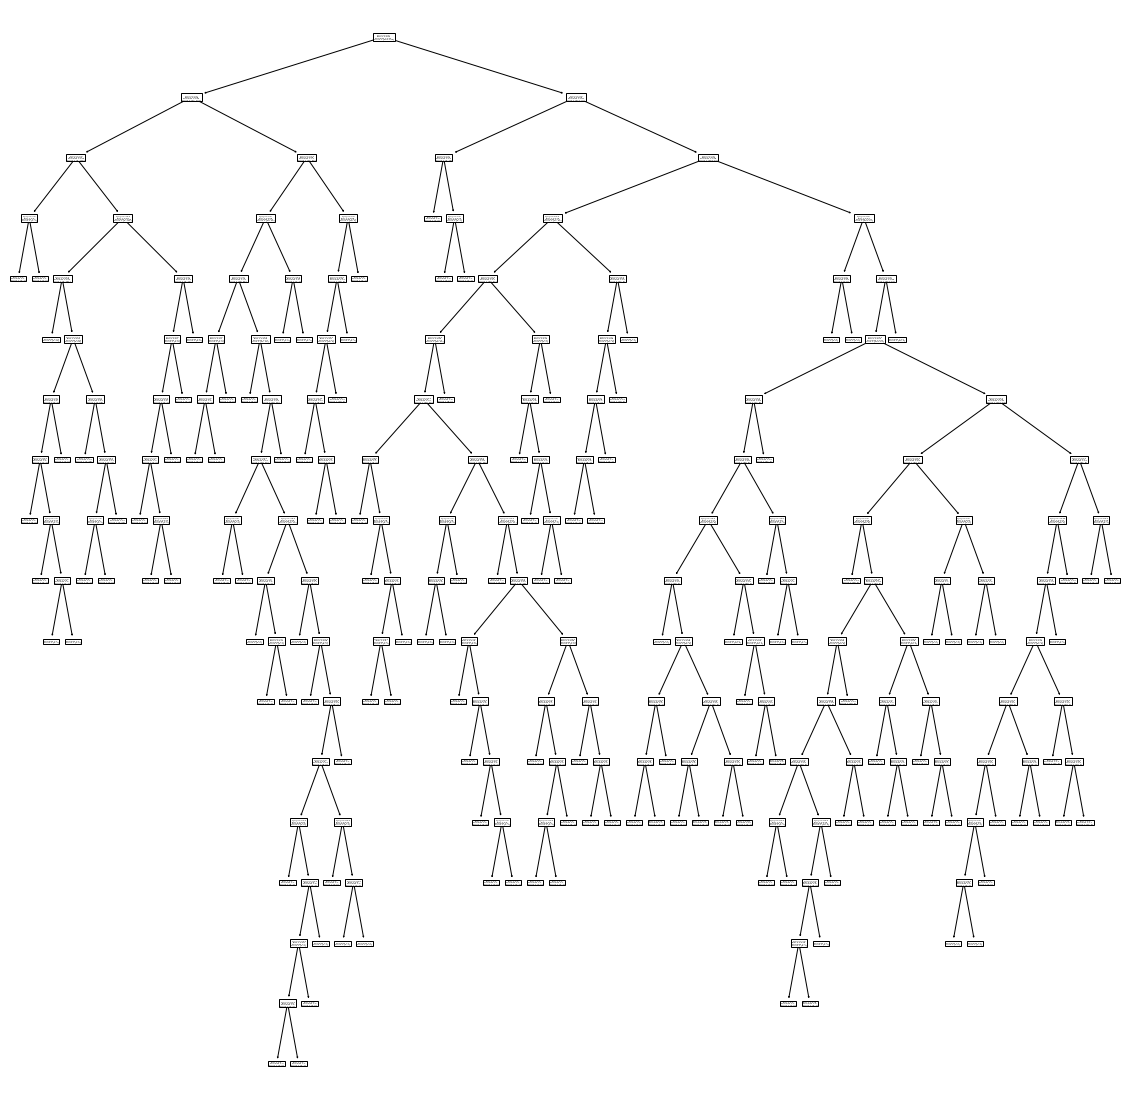

In [41]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20, 20))
tree_titanic = plot_tree(tree)

In [42]:
from sklearn.tree import export_text
tree_rules = export_text(tree, feature_names=X_train.columns.values.tolist())
print(tree_rules)

|--- Sex <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Age <= 2.50
|   |   |   |--- Parch <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- Parch >  1.50
|   |   |   |   |--- class: 0
|   |   |--- Age >  2.50
|   |   |   |--- Age <= 49.50
|   |   |   |   |--- Age <= 24.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  24.50
|   |   |   |   |   |--- Age <= 27.50
|   |   |   |   |   |   |--- Parch <= 1.50
|   |   |   |   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Age >  26.50
|   |   |   |   |   |   |   |   |--- Embarked <= 1.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Embarked >  1.00
|   |   |   |   |   |   |   |   |   |--- SibSp <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- SibSp >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Parch >  1.50
|   |   |   |   |

In [43]:
scores=[]
for max_depth in range(2, 10) : 
    tree=DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree.fit(X_train, y_train)
    score=tree.score(X_test, y_test)
    scores.append(score)
scores

[0.7640449438202247,
 0.7865168539325843,
 0.7865168539325843,
 0.7752808988764045,
 0.7921348314606742,
 0.7865168539325843,
 0.7752808988764045,
 0.7696629213483146]

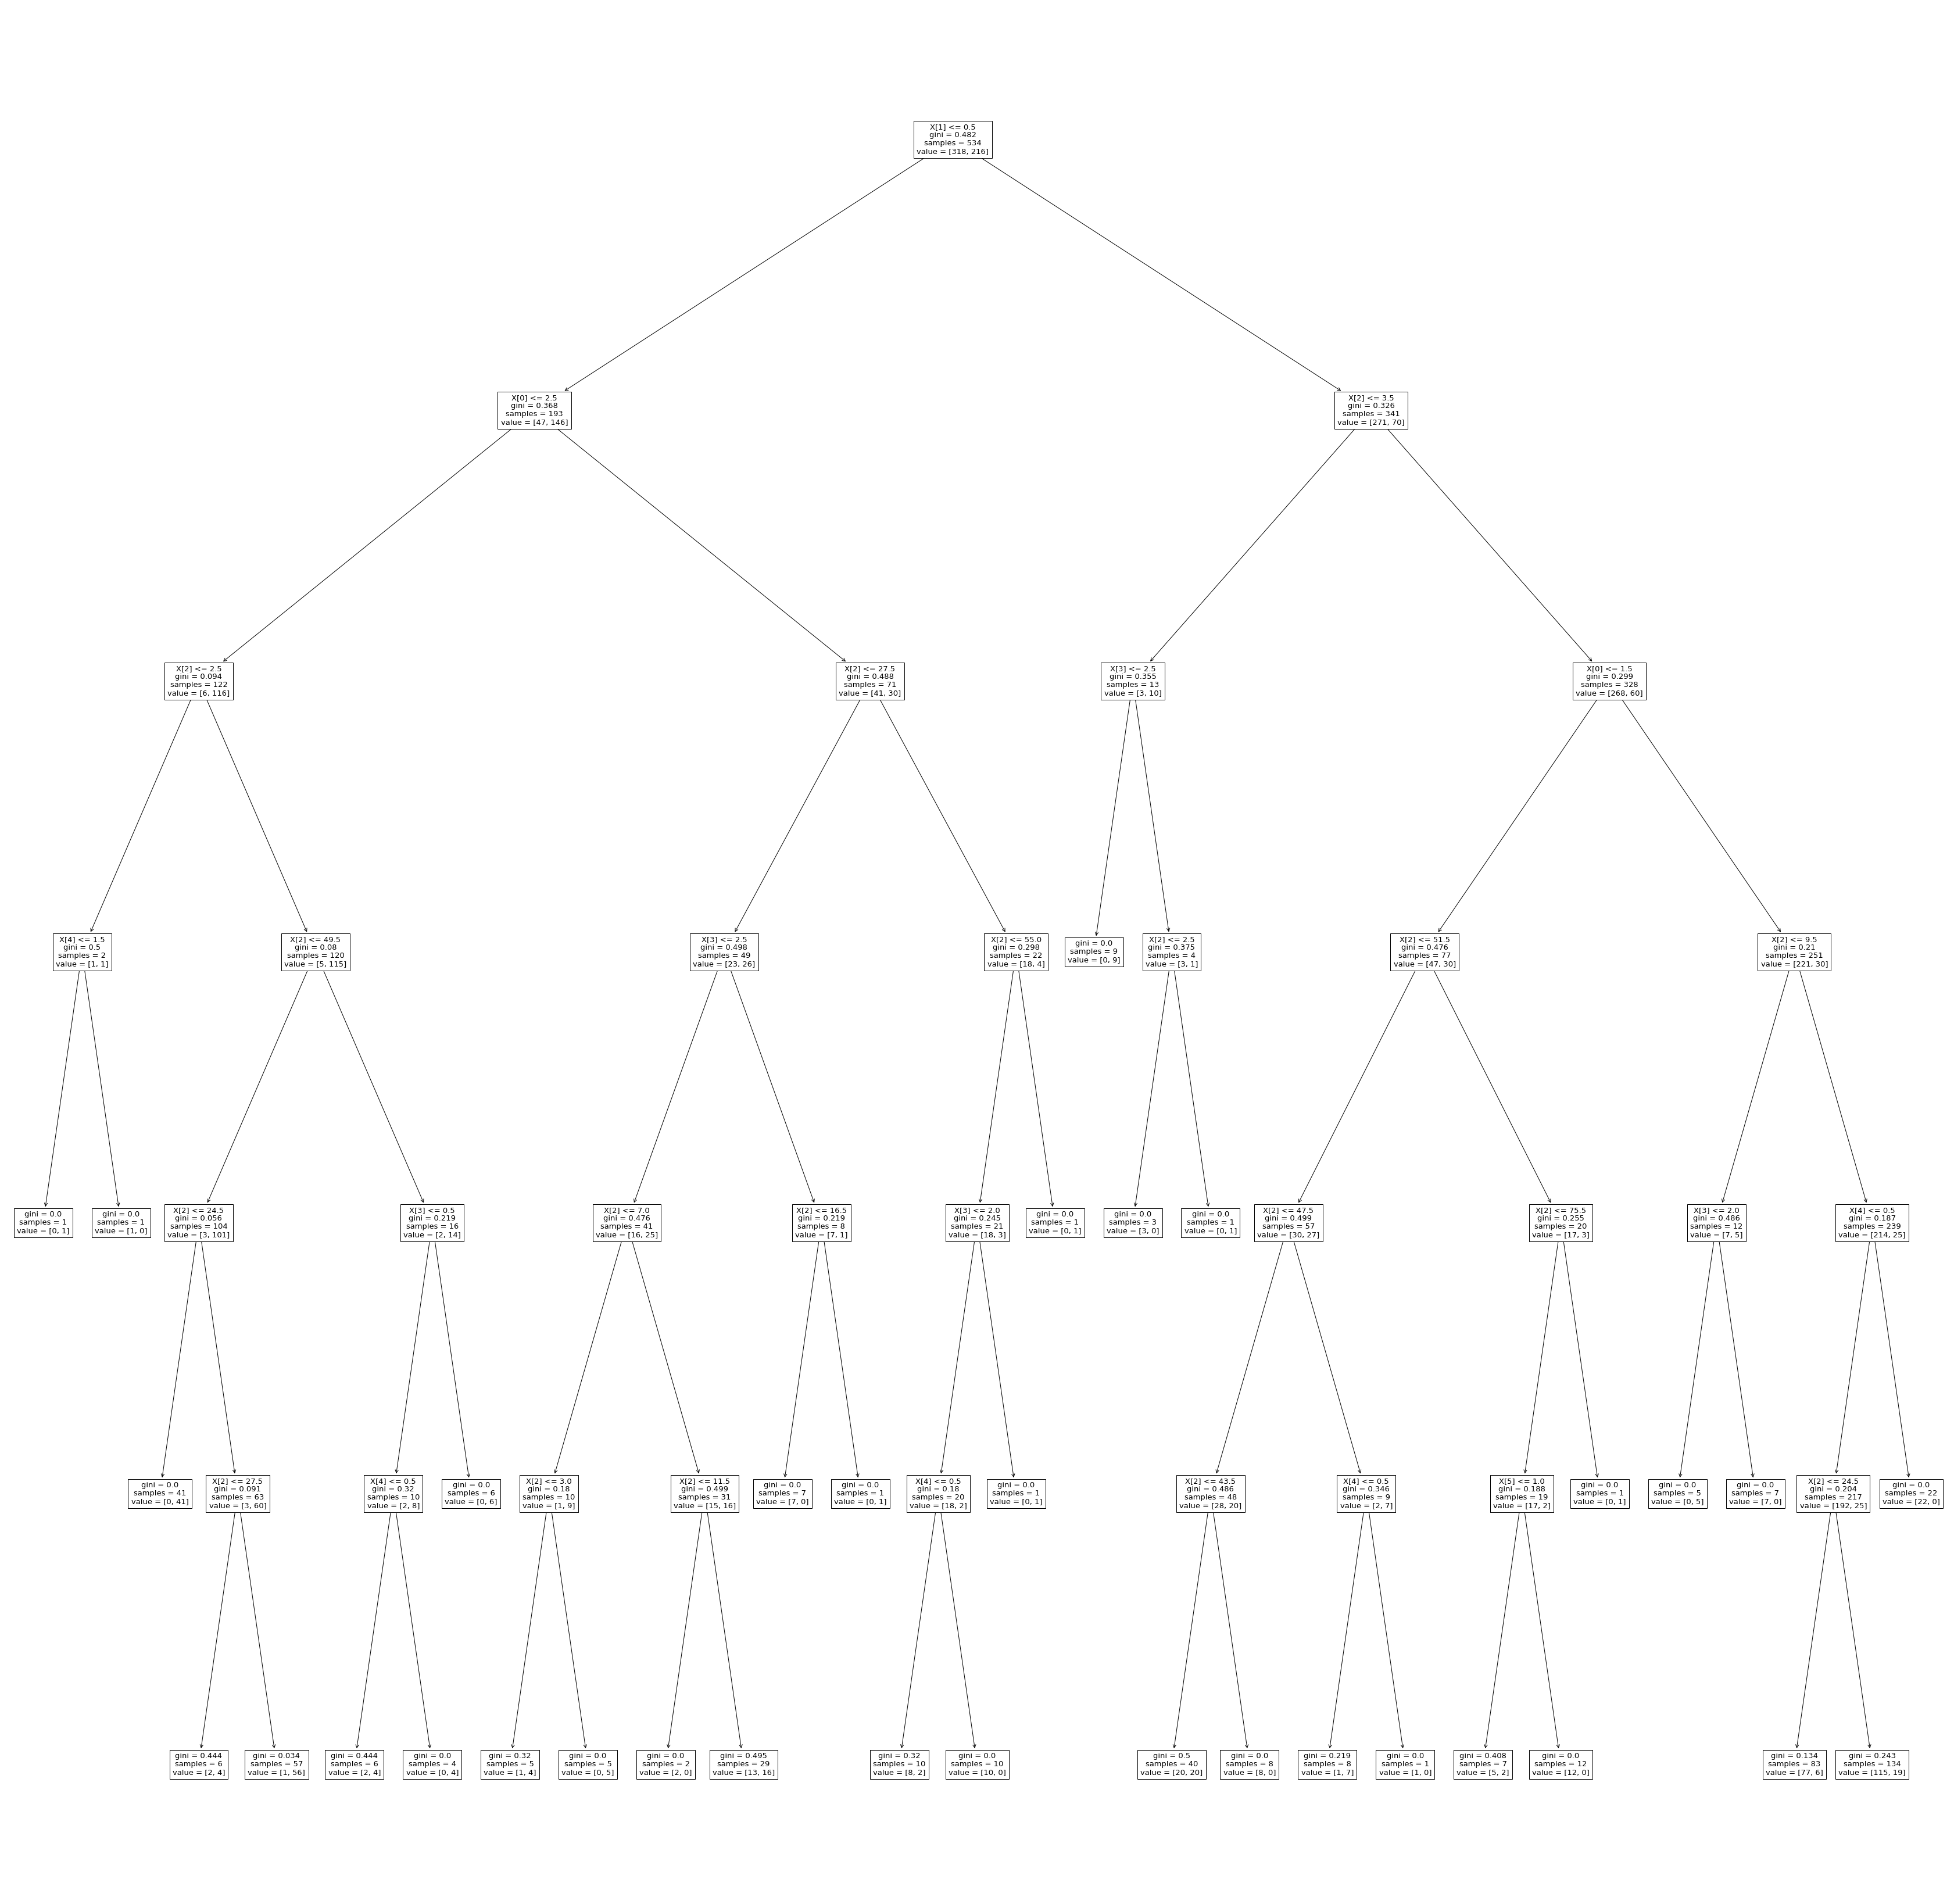

In [44]:
# Algo optimal pour les besoins du plot de l'arbre
tree=DecisionTreeClassifier(max_depth=6, random_state=42)
tree.fit(X_train, y_train)
plt.figure(figsize = (60, 60))
tree_titanic = plot_tree(tree)

In [45]:
tree_rules = export_text(tree, feature_names=X_train.columns.values.tolist())
print(tree_rules)

|--- Sex <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Age <= 2.50
|   |   |   |--- Parch <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- Parch >  1.50
|   |   |   |   |--- class: 0
|   |   |--- Age >  2.50
|   |   |   |--- Age <= 49.50
|   |   |   |   |--- Age <= 24.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  24.50
|   |   |   |   |   |--- Age <= 27.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Age >  27.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- Age >  49.50
|   |   |   |   |--- SibSp <= 0.50
|   |   |   |   |   |--- Parch <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Parch >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- SibSp >  0.50
|   |   |   |   |   |--- class: 1
|   |--- Pclass >  2.50
|   |   |--- Age <= 27.50
|   |   |   |--- SibSp <= 2.50
|   |   |   |   |--- Age <= 7.00
|   |   |   |   |   |--- Age <= 3.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- A

In [63]:
a = tree.score(X_test, y_test)
a

0.7921348314606742

# Final accuracy score : 79.21 %

# PREDICTION SUR LA CLASSE DES PASSAGERS

In [ ]:
t = pd.read_csv('./train.csv')
t

# Preprocessing

In [ ]:
t = t.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare']) # supprimer les colonnes inutiles
t

In [ ]:
t.isna().sum() # somme des données manquantes par colonne

In [ ]:
# t.Age.fillna(value={'age' :t['Age'].mean()}, inplace= True)
# t
t = t.dropna() # supprimer les données maquantes
t

In [ ]:
pd.crosstab(t['Pclass'], t['Survived'], normalize=True, margins=True).T * 100

In [ ]:
pd.crosstab(t['Pclass'], t['Sex'], normalize=True, margins=True).T * 100

In [ ]:
pd.crosstab(t['Pclass'], t['Age'], normalize=True, margins=True).T * 100

In [ ]:
le = LabelEncoder()
t.Sex=le.fit_transform(t.Sex)
t.Embarked=le.fit_transform(t.Embarked)
t

# Decision tree

In [ ]:
X = t[['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]
y = t['Pclass']
# X #  dataframe
# y #  Series

In [ ]:
X.boxplot()

In [ ]:
# Répartition de survived (**avec** `stratification`) à travers les deux échantillons `train` et `test`
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [ ]:
tree2 = DecisionTreeClassifier(random_state=42)
tree2

In [ ]:
tree2.fit(X_train, y_train)

In [ ]:
y_pred = tree2.predict(X_test)
y_pred

In [ ]:
y_test.values

# Conf_mat

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

In [ ]:
y_index = ['1', '2', '3']
pd.DataFrame(conf_mat, columns=y_index, index=y_index)

In [ ]:
class_names = y_index

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names=class_names)

In [ ]:
accur1 = conf_mat.diagonal().sum()/conf_mat.sum()
accur1

In [ ]:
from sklearn.metrics import accuracy_score
accur2 = accuracy_score(y_test, y_pred)
accur2

# Accuracy score : 56.18 %

### Formulaire

In [ ]:
def classification():
    Survived=int(input("Enter the Survived state : "))
    Sex=int(input("Enter the Sex : "))
    Age=int(input("Enter the Age : "))
    SibSp=int(input("Enter the SibSp : "))
    Parch=int(input("Enter the Parch : "))
    Embarked=int(input("Enter the Embarked port number : "))
    x = np.array([Survived, Sex, Age, SibSp, Parch, Embarked]).reshape(1, 6)
    if tree2.predict(x)[0]==1:
        return "1ère Classe"
    elif tree2.predict(x)[0]==2:
        return "2ème Classe"
    else :
        return "3ème Classe"

In [ ]:
# classification()

In [ ]:
plt.figure(figsize = (20, 20))
tree_t = plot_tree(tree2)

In [ ]:
tree_rules = export_text(tree2, feature_names=X_train.columns.values.tolist())
print(tree_rules)

In [ ]:
scores=[]
for max_depth in range(2, 10) : 
    tree2=DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree2.fit(X_train, y_train)
    score=tree2.score(X_test, y_test)
    scores.append(score)
scores

In [ ]:
# Algo optimal pour les besoins du plot de l'arbre
tree2=DecisionTreeClassifier(max_depth=7, random_state=42)
tree2.fit(X_train, y_train)
plt.figure(figsize = (60, 60))
tree_t = plot_tree(tree2)

In [ ]:
tree_rules = export_text(tree2, feature_names=X_train.columns.values.tolist())
print(tree_rules)

In [ ]:
a = tree2.score(X_test, y_test)
a

# Final accuracy score :  58.98 %